# IMPORT CAC THU VIEN CAN THIET 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# TẢI DỮ LIỆU THÔ

In [48]:
data_path = '/Users/binhminh/Documents/Project ML/Breast-Cancer-Prediction/breast_cancer.csv'
raw_data = pd.read_csv(data_path)

raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
df = pd.DataFrame(raw_data, columns=raw_data.columns)
df['target'] = df['diagnosis'].map({'M':1, 'B':0})

df.drop(['id', 'diagnosis'], axis=1, inplace=True)

df.info()

null_counts = df.isnull().sum()
if null_counts.any():
    print("\n\nMissing values detected:")
    print(null_counts[null_counts > 0])
else:
    print("\n\nNo missing values detected.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave_points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

# XỬ LÝ NGOẠI LAI

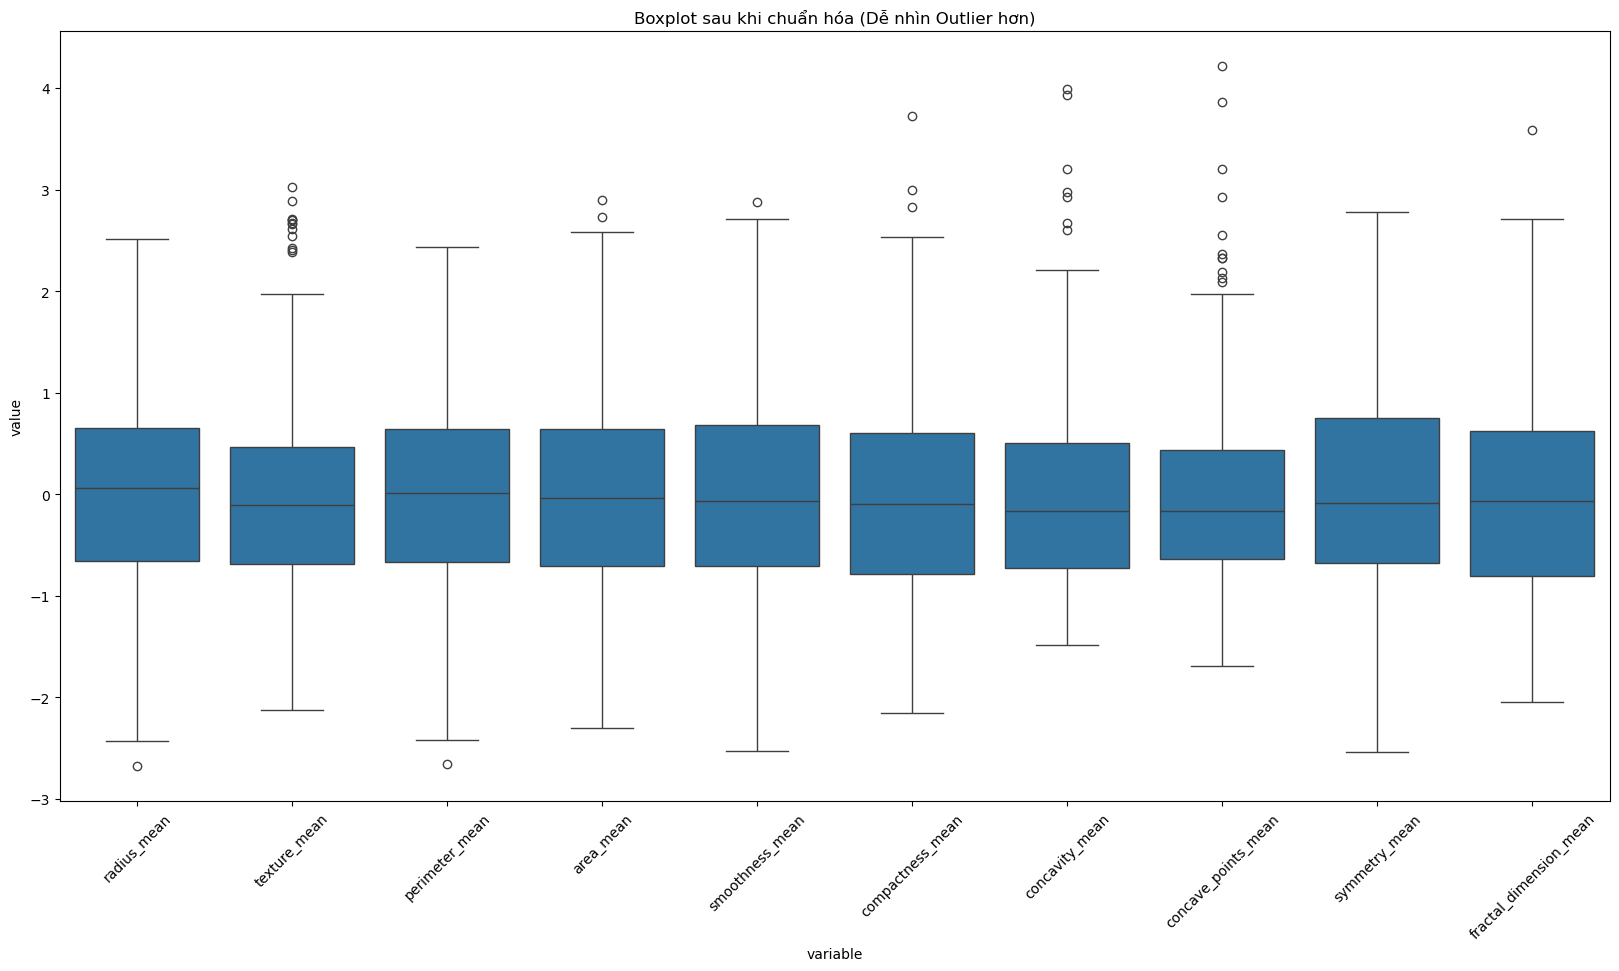

In [53]:
# Code vẽ boxplot đã chuẩn hóa (chỉ để nhìn, không làm thay đổi dữ liệu gốc)
data_norm = (df - df.mean()) / df.std()
data_plot = pd.melt(data_norm.iloc[:, 0:10]) # Lấy 10 cột đầu xem trước

plt.figure(figsize=(20, 10))
sns.boxplot(x='variable', y='value', data=data_plot)
plt.xticks(rotation=45)
plt.title('Boxplot sau khi chuẩn hóa (Dễ nhìn Outlier hơn)')
plt.show()

In [51]:
def remove_outlier_iqr(df, column, threshold=3.0):
    df_clean = df.copy()
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    condition = (df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)
    return df_clean[condition]

print("\n\nRemoving outliers using IQR method...")
print("Original data shape:", df.shape)
for col in df.columns[:-1]:  # Exclude target column
    df = remove_outlier_iqr(df, col, threshold=1.5)

print("Data shape after outlier removal:", df.shape)




Removing outliers using IQR method...
Original data shape: (569, 31)
Data shape after outlier removal: (277, 31)


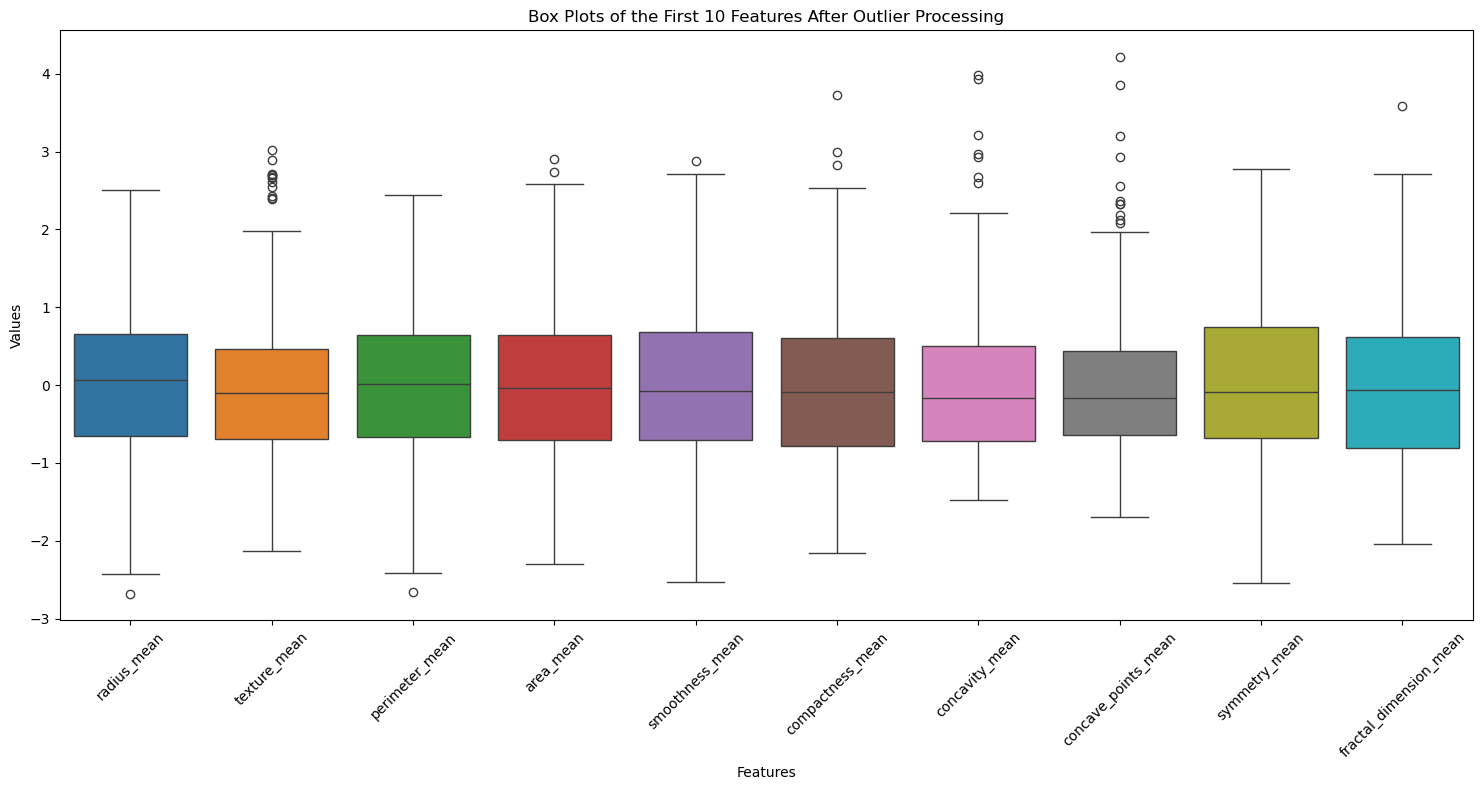

In [45]:
import seaborn as sns
import seaborn as sns

# Code vẽ boxplot đã chuẩn hóa (chỉ để nhìn, không làm thay đổi dữ liệu gốc)
data_norm = (df - df.mean()) / df.std()

import matplotlib.pyplot as plt

# Select the first 10 features from the DataFrame
features_to_plot = data_norm.columns[:10]

# Set the figure size
plt.figure(figsize=(15, 8))

# Create box plots for the selected features
sns.boxplot(data=data_norm[features_to_plot])

# Set the title and labels
plt.title('Box Plots of the First 10 Features After Outlier Processing')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [52]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\n\nData preprocessing completed. Ready for model training.")

np.save('X_train.npy', X_train_scaled)
np.save('X_test.npy', X_test_scaled)
np.save('y_train.npy', y_train.values)
np.save('y_test.npy', y_test.values)

print("\n\nPreprocessed data saved as .npy files.")



Data preprocessing completed. Ready for model training.


Preprocessed data saved as .npy files.
